In [8]:
import pickle
import matplotlib
import matplotlib.pylab as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np

In [2]:
#LOAD DATA
f = open('../instance_files/instance_iceagg_flat_r10_compareDunnavan1', 'rb')
agg_as_flat, agg_bs_flat, agg_cs_flat, phi2Ds_flat, cplxs_flat, dds_flat = pickle.load(f)
f.close()
f = open('../instance_files/instance_iceagg_rand_r10_compareDunnavan', 'rb')
agg_as_rand, agg_bs_rand, agg_cs_rand, phi2Ds_rand, cplxs_rand, dds_rand, major_ax_zs, depths = pickle.load(f)
f.close()

In [3]:
large = 20; med = 16; small = 14
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (7,7),
          'axes.labelsize': large,
          'xtick.labelsize': large,
          'ytick.labelsize': large,
          'figure.titlesize': large,
          "font.family": "serif"}
plt.rcParams.update(params)

In [4]:
def discrete_cmap(N, base_cmap=None):
    """Create an N-bin discrete colormap from the specified input map"""
    base = plt.cm.get_cmap(base_cmap)
    color_list = base(np.linspace(0, 1, N))
    cmap_name = base.name + str(N)
    return base.from_list(cmap_name, color_list, N)

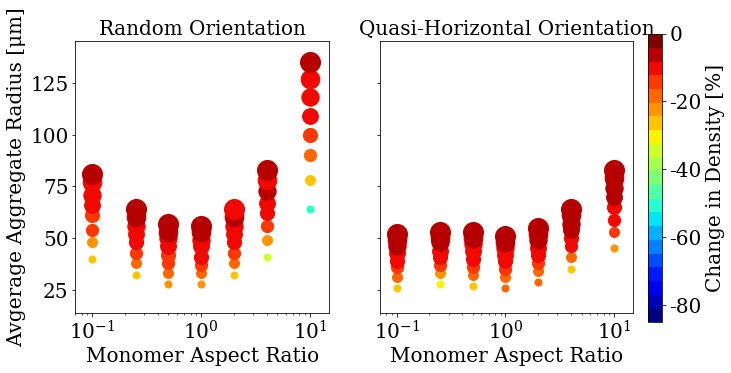

In [13]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(10,5))

from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

cmap=discrete_cmap(21,'jet')
# define the bins and normalize
norm = matplotlib.colors.Normalize(vmin=-85, vmax=0)

dds_rand_perc = dds_rand*100
phiarr = [0.1, 0.25, 0.5, 1.0, 2.0, 4.0, 10.]
Ns = np.arange(9)
for N in Ns:
    for p in range(len(phiarr)):
        agg_r = np.round(np.power((np.power(np.mean(agg_as_rand[p,0,:,N]),2)*np.mean(agg_cs_rand[p,0,:,N])),(1./3.)))
        ax1.scatter(phiarr[p], agg_r, c=cmap(norm(np.mean(dds_rand_perc[p,0,:,N]))), s=N*50)
        
ax1.set_xlim(0.07, 15)
ax1.set_xscale('log')
ax1.set_ylabel('Avgerage Aggregate Radius [\u03BCm]')
ax1.set_xlabel('Monomer Aspect Ratio')
ax1.set_title('Random Orientation')

dds_flat_perc = dds_flat*100
for N in Ns:
    for p in range(len(phiarr)):
        agg_r = np.round(np.power((np.power(np.mean(agg_as_flat[p,0,:,N]),2)*np.mean(agg_cs_flat[p,0,:,N])),(1./3.)))
        ax2.scatter(phiarr[p], agg_r, c=cmap(norm(np.mean(dds_flat_perc[p,0,:,N]))), s=N*50)
ax2.set_xlim(0.07, 15)
ax2.set_xscale('log')
ax2.set_xlabel('Monomer Aspect Ratio')
ax2.set_title('Quasi-Horizontal Orientation')

cb = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
cax = fig.add_axes([0.92,0.1,0.02,0.8])  #[left, bottom, width, height] 
cbar = plt.colorbar(cb, format='%d', cax=cax)
# cb = mpl.colorbar.ColorbarBase(cax, cmap=cmap, norm=norm,
#     spacing='proportional', ticks=bounds, boundaries=bounds, format='%1i')
cbar.set_label('Change in Density [%]');


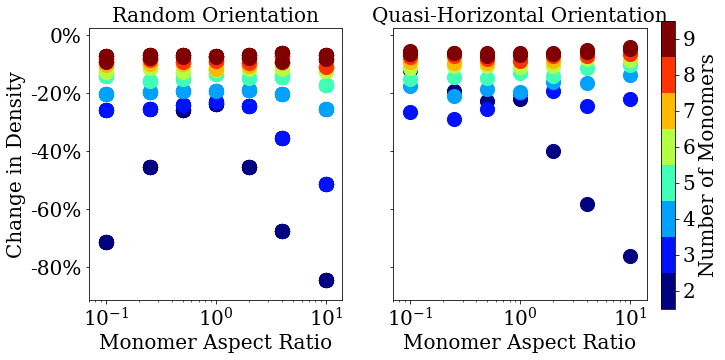

In [15]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(10,5))

cmap = plt.cm.jet
norm = matplotlib.colors.Normalize(vmin=0, vmax=10)
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]

# create the new map
cmap = matplotlib.colors.LinearSegmentedColormap.from_list(
    'Custom cmap', cmaplist, cmap.N)

# define the bins and normalize
bounds = np.linspace(0, 8, 9)
norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)

phiarr = [0.1, 0.25, 0.5, 1.0, 2.0, 4.0, 10.]
Ns = np.arange(9)

for N in Ns:
    for N in Ns:
        ax1.scatter(phiarr, np.mean(dds_rand[:,0,:,N], axis=1), c=cmap(norm(N),8), s=200)
ax1.set_xlim(0.07, 14)
#ax1.set_ylim(-0.15, 0.0)
vals = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0%}'.format(x) for x in vals])
ax1.set_xscale('log')
ax1.set_ylabel('Change in Density')
ax1.set_title('Random Orientation')
ax1.set_xlabel('Monomer Aspect Ratio')

for N in Ns:
    ax2.scatter(phiarr, np.mean(dds_flat[:,0,:,N], axis=1), c=cmap(norm(N),8), s=200)
ax2.set_xlim(0.07, 14)
#ax2.set_ylim(-0.15, 0.0)
ax2.set_xscale('log')
ax2.set_title('Quasi-Horizontal Orientation')
ax2.set_xlabel('Monomer Aspect Ratio')
tick_locs = np.linspace(0, Ns)

cb = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
cax = fig.add_axes([0.92,0.1,0.02,0.8])  #[left, bottom, width, height] 
cbar = plt.colorbar(cb, ticks=np.linspace(0, 9, 10) + .5, format='%d', cax=cax)
cbar.set_ticklabels([2,3,4,5,6,7,8,9,10])
cbar.set_label('Number of Monomers');

#fig.savefig('../plots/dd_nmono_bothorientations.png', format='png', dpi=300);